In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sweetviz as sw
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

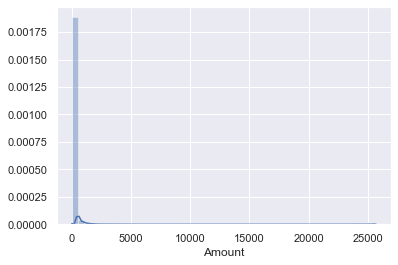

In [5]:
sns.distplot(data['Amount'])

In [6]:
data.Amount.quantile(0.9855)

835.0

In [7]:
data=data[data['Amount']<=835.0]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


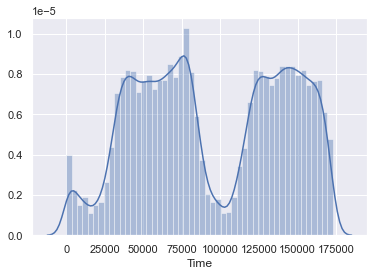

In [8]:
sns.distplot(data['Time'])

In [9]:
data['Time'].describe()

count    280713.000000
mean      94837.583023
std       47503.858360
min           0.000000
25%       54255.000000
50%       84736.000000
75%      139349.000000
max      172792.000000
Name: Time, dtype: float64

In [10]:
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


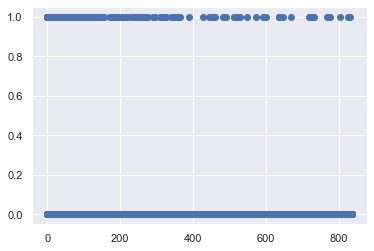

In [11]:
plt.scatter(pow(data['Amount'],1),data['Class'])

In [12]:
data['Class'].value_counts()

0    280232
1       481
Name: Class, dtype: int64

In [13]:
report=sw.analyze(data)
report.show_html()

:FEATURES DONE:                    |                     | [  0%]   00:17  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)


Creating Associations graph... DONE!


In [14]:
Xtrain=data.iloc[:,:-1]
ytrain=data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(Xtrain,ytrain,test_size=(0.1),random_state=42)
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,test_size=(0.1),random_state=43)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.utils import class_weight
#a=class_weight.compute_class_weight('balanced',np.array([0.,1.]),ytrain)
tree=DecisionTreeClassifier(max_depth=1,class_weight='balanced')
tree.fit(Xtrain,ytrain)
#pg={'max_depth':[1,2,3,4,5,6,7,8,9,10]}
#gs=GridSearchCV(tree,pg,cv=5,scoring='f1',refit=True,n_jobs=-1)
#gs.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
gs.best_params_

{'max_depth': 10}

[[220895   6080]
 [    53    348]]


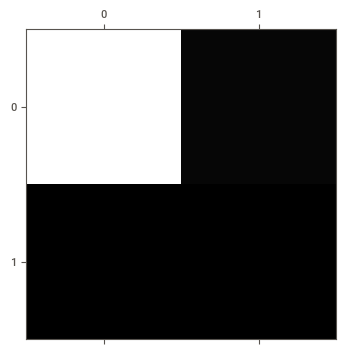

In [17]:
#train set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytrain,tree.predict(Xtrain))
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)

[[24542   693]
 [    4    26]]


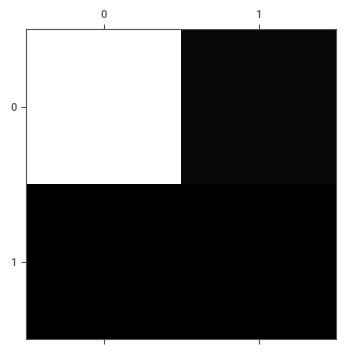

In [18]:
#validation set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yval,tree.predict(Xval))
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)

In [19]:
#train set
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(ytrain,tree.predict(Xtrain)))
print(recall_score(ytrain,tree.predict(Xtrain)))
print(f1_score(ytrain,tree.predict(Xtrain)))

0.054138145612943375
0.8678304239401496
0.10191828964709328


In [20]:
#validation set
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(yval,tree.predict(Xval)))
print(recall_score(yval,tree.predict(Xval)))
print(f1_score(yval,tree.predict(Xval)))

0.03616133518776078
0.8666666666666667
0.06942590120160214


0.9205216664254114


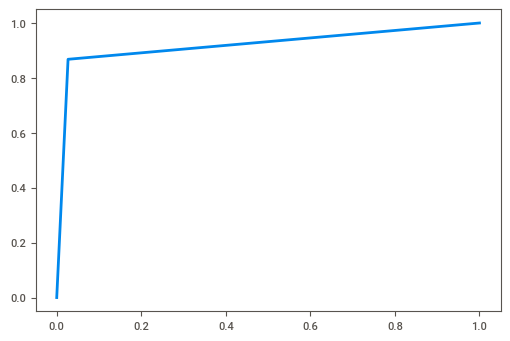

In [21]:
#train set
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(ytrain,tree.predict(Xtrain))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,0],[1,1],'k--')
print(roc_auc_score(ytrain,tree.predict(Xtrain)))

0.9196024040684235


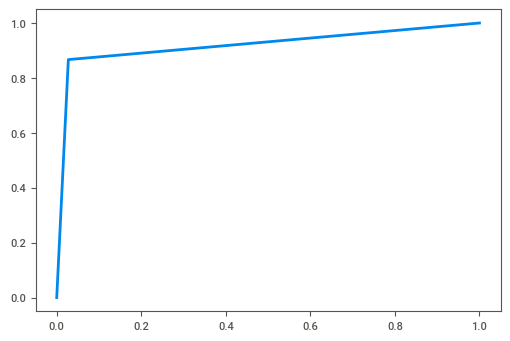

In [22]:
#validation set
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(yval,tree.predict(Xval))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,0],[1,1],'k--')
print(roc_auc_score(yval,tree.predict(Xval)))

In [37]:
#max_depth=1,2,3,7 produced best results, standout being 1
#recall=86.67% auc=92%